# Pruebas de animación

In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

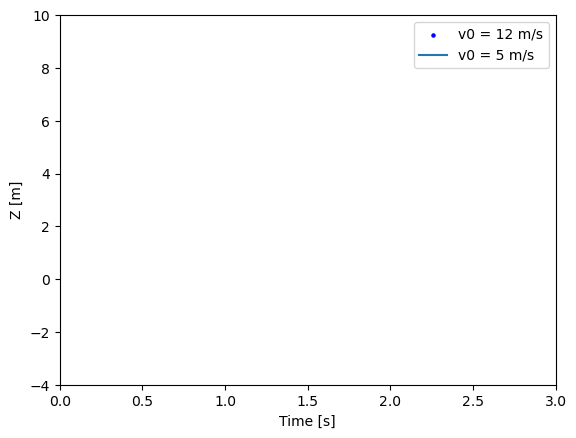

In [8]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
ani.save("tiro_p.gif", writer = "pillow")

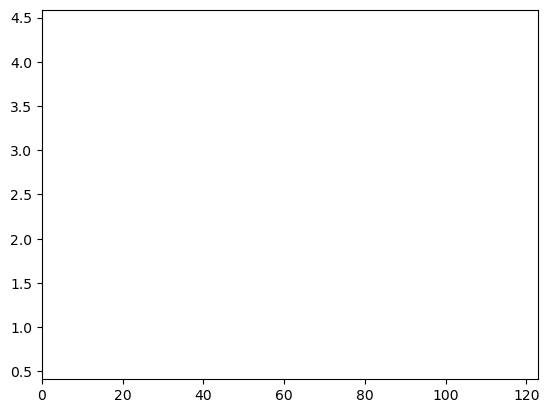

In [9]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
ani.save("bars.gif", writer = "pillow")

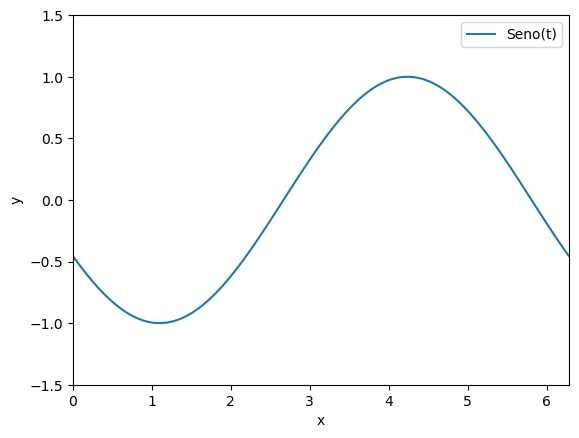

In [10]:
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

line, = ax.plot(x, y, label="Seno(t)")

ax.set(xlim=(0, 2 * np.pi), ylim=(-1.5, 1.5), xlabel="x", ylabel="y")
ax.legend()

def update(frame):
    line.set_ydata(np.sin(x + frame / 10))  # Desplazamiento en fase
    return line,

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=True)
ani.save("seno.gif", writer = "pillow")